# INSURANCE PREMIUM PREDICTION USING REGRESSION

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [66]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [67]:
df.shape

(1338, 7)

In [68]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [71]:
num = df.select_dtypes(np.number)
num.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [72]:
num.columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [73]:
cat = df.select_dtypes(np.object)
cat.head()

<ipython-input-73-13abad0d1f3f>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df.select_dtypes(np.object)


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [74]:
cat.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [75]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [76]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [77]:
df.describe(include = np.object)

<ipython-input-77-a823d8da510e>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include = np.object)


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


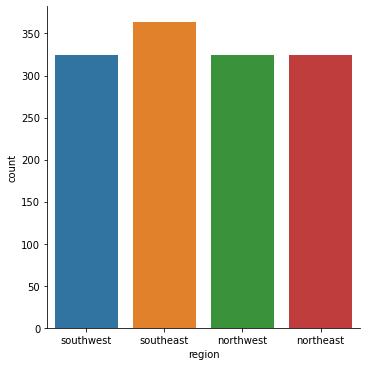

In [78]:
sns.catplot(x = 'region',kind = 'count',data = df);

In [79]:
## Southeast region dominates the data

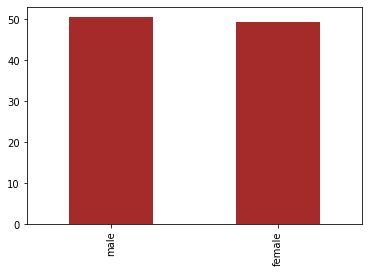

In [80]:
(df.sex.value_counts(normalize= True)*100).plot(kind = 'bar',color = 'brown');

In [81]:
## Both male and female are equally represented

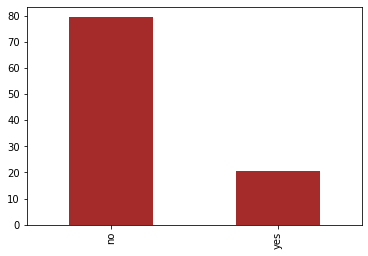

In [82]:
(df.smoker.value_counts(normalize= True)*100).plot(kind = 'bar',color = 'brown');

In [83]:
## The dataset is dominated by non-smokers

In [84]:
df.children.value_counts(normalize= True)*100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

In [85]:
## Nearly 50% do not have a child

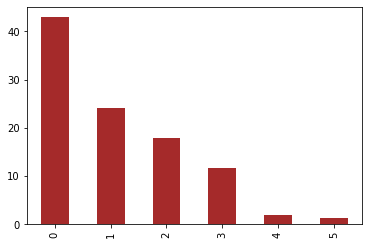

In [86]:
(df.children.value_counts(normalize= True)*100).plot(kind = 'bar',color = 'brown');

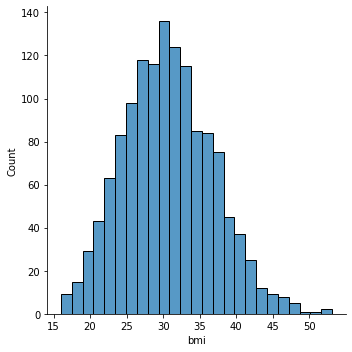

In [87]:
sns.displot(df.bmi);

In [88]:
fitness = pd.cut(x=df['bmi'], bins=[1,18.5,24.9,30,100],
                 labels = ['underweight','healthy','overweight','obese'])
fitness.value_counts(normalize = True)*100

obese          52.167414
overweight     29.745889
healthy        16.517190
underweight     1.569507
Name: bmi, dtype: float64

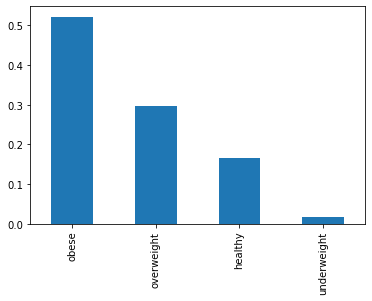

In [89]:
fitness.value_counts(normalize = True).plot(kind = 'bar');

- #### Around 50% individuals are overweight
- #### Around 82% individuals do not have healthy bmi 

In [90]:
df['fitness'] = fitness
df.head()

,age,sex,bmi,children,smoker,region,expenses,fitness
0,19,female,27.9,0,yes,southwest,16884.92,overweight
1,18,male,33.8,1,no,southeast,1725.55,obese
2,28,male,33.0,3,no,southeast,4449.46,obese
3,33,male,22.7,0,no,northwest,21984.47,healthy
4,32,male,28.9,0,no,northwest,3866.86,overweight


In [91]:
## Mapping the influence of fitness status on insurance expenses
pd.pivot_table(data = df, index = 'fitness', values = 'expenses',aggfunc= 'mean')

,expenses
fitness,
underweight,8657.621429
healthy,10404.900136
overweight,11044.371809
obese,15585.776834


- #### The average expenses is higher for obese category, and varies much from overweight category
- #### Healthy and overweight expense average does not vary much

In [92]:
## Mapping the influence of smoking habit on insurance expenses
pd.pivot_table(data = df, index = 'smoker', values = 'expenses',aggfunc= 'mean')

,expenses
smoker,
no,8434.268449
yes,32050.231971


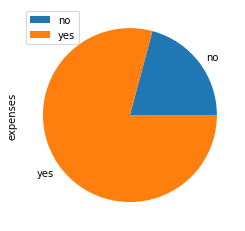

In [93]:
pd.pivot_table(data = df, index = 'smoker', values = 'expenses',aggfunc= 'mean').plot(kind = 'pie',subplots =True);

- ####  **The smokers spend nearly 4 times more on insurance when compared to non smokers**

In [94]:
pd.pivot_table(data = df, index = 'sex', values = 'expenses',aggfunc= 'mean')

,expenses
sex,
female,12569.578897
male,13956.751420


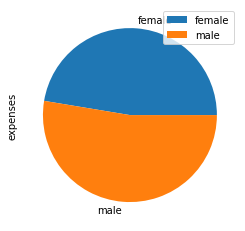

In [95]:
pd.pivot_table(data = df, index = 'sex', values = 'expenses',aggfunc= 'mean').plot(kind = 'pie',subplots =True);

- #### Men spend slightly higher than female on insurance

In [96]:
pd.pivot_table(data = df, index = 'region', values = 'expenses',aggfunc= 'mean')

,expenses
region,
northeast,13406.384691
northwest,12417.575169
southeast,14735.411538
southwest,12346.937908


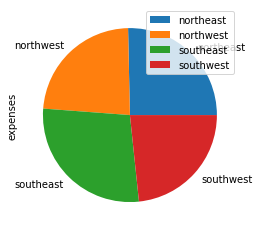

In [97]:
pd.pivot_table(data = df, index = 'region', values = 'expenses',aggfunc= 'mean').plot(kind = 'pie',subplots =True);

- #### Southeast has the highest mean insurance expenses

In [98]:
age_grp = pd.cut(x=df['age'], bins=[1,5,20,35,60,100],
                 labels = ['under 5','5 to 20 yrs','20 to 35 yrs','35 to 60 yrs','above 60'])

In [99]:
df['age_grp'] = age_grp

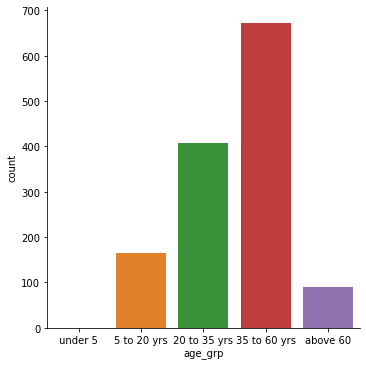

In [100]:
sns.catplot(x = 'age_grp',kind = 'count',data = df);

In [101]:
pd.pivot_table(data = df, index = 'age_grp', values = 'expenses',aggfunc= 'mean')

,expenses
age_grp,
5 to 20 yrs,8713.482771
20 to 35 yrs,10163.952157
35 to 60 yrs,15223.992125
above 60,21063.163407


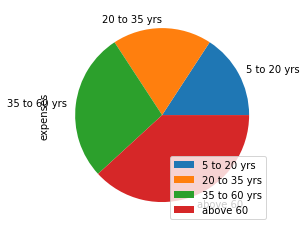

In [102]:
pd.pivot_table(data = df, index = 'age_grp', values = 'expenses',aggfunc= 'mean').plot(kind = 'pie',subplots =True);

- ####  Individuals above 60 spend a lot on insurance

In [103]:
df3 = df.copy()

In [104]:
df.drop(['age_grp','fitness'],axis = 1,inplace= True)

In [105]:
dum = pd.get_dummies(cat,drop_first= True)
dum

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [106]:
df = pd.concat([num,dum],axis =1)
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [107]:
x = df.drop('expenses',axis = 1)
y = df.expenses

In [108]:
stats.shapiro(df)

C:\Users\abhinaya\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.28081321716308594, pvalue=0.0)

- #### Since data is not normal, we will opt for minmaxscaling

### SCALING

In [109]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
cols = x.columns
x = mm.fit_transform(x)
x = pd.DataFrame(x,columns= cols)
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.320755,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479784,0.2,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458221,0.6,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.180593,0.0,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347709,0.0,1.0,0.0,1.0,0.0,0.0


In [110]:
y = (y - y.mean()) / y.std()

### TRAIN-TEST SPLIT

In [111]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state= 78)

In [112]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 8)
(402, 8)
(936,)
(402,)


### Model Building 

### Linear Regression 

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
y_predlr = lr.predict(x_test)
lr_mse = mean_squared_error(y_test,y_predlr)
lr_rmse = np.sqrt(mean_squared_error(y_test,y_predlr))
lr_r2 = r2_score(y_test,y_predlr)

### SGD Regressor

In [114]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd = sgd.fit(x_train, y_train)
y_predsgd = sgd.predict(x_test)
sgd_mse = mean_squared_error(y_test,y_predsgd)
sgd_rmse = np.sqrt(mean_squared_error(y_test,y_predsgd))
sgd_r2 = r2_score(y_test,y_predsgd)

### Decision Tree Regression 

In [115]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt = dt.fit(x_train,y_train)
y_preddt = dt.predict(x_test)
dt_mse = mean_squared_error(y_test,y_preddt)
dt_rmse = np.sqrt(mean_squared_error(y_test,y_preddt))
dt_r2 = r2_score(y_test,y_preddt)

### Random Forest Regressor 

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf  = rf .fit(x_train,y_train)
y_predrf  = rf.predict(x_test)
rf_mse = mean_squared_error(y_test,y_predrf)
rf_rmse = np.sqrt(mean_squared_error(y_test,y_predrf))
rf_r2 = r2_score(y_test,y_predrf)

### Adaboost Regressor

In [117]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada  = ada.fit(x_train,y_train)
y_predada  = ada.predict(x_test)
ada_mse = mean_squared_error(y_test,y_predada)
ada_rmse = np.sqrt(mean_squared_error(y_test,y_predada))
ada_r2 = r2_score(y_test,y_predada)

### XGBoost Regressor 

In [118]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg = xg.fit(x_train,y_train)
y_predxg  = xg.predict(x_test)
xg_mse = mean_squared_error(y_test,y_predxg)
xg_rmse = np.sqrt(mean_squared_error(y_test,y_predxg))
xg_r2 = r2_score(y_test,y_predxg)

###  KNN Regression

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn = knn.fit(x_train,y_train)
y_predknn  = knn.predict(x_test)
knn_mse = mean_squared_error(y_test,y_predknn)
knn_rmse = np.sqrt(mean_squared_error(y_test,y_predknn))
knn_r2 = r2_score(y_test,y_predknn)

### Bagging Regressor 

In [120]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br = br.fit(x_train,y_train)
y_predbr  = br.predict(x_test)
br_mse = mean_squared_error(y_test,y_predbr)
br_rmse = np.sqrt(mean_squared_error(y_test,y_predbr))
br_r2 = r2_score(y_test,y_predbr)

### MODEL EVALUATION

In [121]:
index = ['Linear Regression','SGD Regressor','Decision Tree','Random Forest','KNN','AdaBoost','XgBoost','Bagging']
RMSE = [lr_rmse,sgd_rmse,dt_rmse,rf_rmse,knn_rmse,ada_rmse,xg_rmse,br_rmse]
R_squared = [lr_r2,sgd_r2,dt_r2,rf_r2,knn_r2,ada_r2,xg_r2,br_r2]

In [122]:
evaluation_table = pd.DataFrame(index= index)
evaluation_table['RMSE'] = RMSE
evaluation_table['R_squared'] = R_squared

In [123]:
evaluation_table

,RMSE,R_squared
Linear Regression,0.496447,0.721827
SGD Regressor,0.509364,0.707163
Decision Tree,0.617806,0.569202
Random Forest,0.414702,0.805893
KNN,0.460988,0.760145
AdaBoost,0.443581,0.777917
XgBoost,0.457392,0.763872
Bagging,0.437475,0.783989


- ***RandomForest Regressor has low RMSE and better R-Squared value in comparison with other models. We can do hyperparameter tuning which may increase the model's performance***

### REGULARIZATION

In [192]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 11.5)
ridge_model = ridge.fit(x_train, y_train)
y_predrid = ridge_model.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_predrid)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test,y_predrid)

In [193]:
print(mse_ridge)
print(rmse_ridge)
print(r2_ridge)

0.2437656211374651
0.4937262613406999
0.7248674912917128


In [152]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso_model = lasso.fit(x_train, y_train)
y_predlasso = lasso_model.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_predlasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test,y_predlasso)

In [153]:
print(mse_lasso)
print(rmse_lasso)
print(r2_lasso)

0.2456777601317623
0.49565891511377286
0.7227093050961161


- #### Regularization proves to be not useful since there is no much variation in r2 and rmse values in comparison with not regularized models

### HYPERPARAMETER TUNING

In [177]:
from sklearn.model_selection import RandomizedSearchCV
param = [{'n_estimators' : [90, 100, 150, 200,225,227,230,250],
'max_depth' : [10, 15, 20,16,17],
'min_samples_split' : [2, 5, 8,9,10],
 'criterion':['mse','mae']}]

In [178]:
rf1 = RandomForestRegressor(random_state = 98)
rf_cv = RandomizedSearchCV(rf1, param_distributions = param,cv = 5,random_state= 53)
rf_cv = rf_cv.fit(x_train,y_train)

In [179]:
rf_cv.best_params_

{'n_estimators': 250,
 'min_samples_split': 10,
 'max_depth': 17,
 'criterion': 'mse'}

In [180]:
rf = RandomForestRegressor(n_estimators= 250,min_samples_split= 10,max_depth= 17,criterion= 'mse')
rf  = rf .fit(x_train,y_train)
y_predrf  = rf.predict(x_test)
rf_mse = mean_squared_error(y_test,y_predrf)
rf_rmse = np.sqrt(mean_squared_error(y_test,y_predrf))
rf_r2 = r2_score(y_test,y_predrf)

In [181]:
print(rf_mse)
print(rf_rmse)
print(rf_r2)

0.15880347601161804
0.3985015382801151
0.8207622611310155


- #### Tuning hyperparameters greatly improved our R-squared value
- #### Final r2 score value 0.82 shows us that our model can explain upto 82% variation in the target

In [196]:
pd.Series(rf.feature_importances_,index= x_train.columns).sort_values(ascending= False)

smoker_yes          0.662094
bmi                 0.186032
age                 0.128620
children            0.015015
region_northwest    0.002803
region_southwest    0.002041
sex_male            0.001773
region_southeast    0.001622
dtype: float64

- #### Smoking influences the premium to very large extent
- #### Age and BMI also shows strong influence